In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline


In [2]:
import os

print(os.getcwd())  # current working directory
print(os.path.exists("data/raw/city_day.csv"))  # True if file found


c:\Users\LENOVO\Desktop\project by info\notebooks
False


In [3]:
import os
print(os.getcwd())


c:\Users\LENOVO\Desktop\project by info\notebooks


In [4]:
import pandas as pd

city_day     = pd.read_csv("../data/raw/city_day.csv")
station_day  = pd.read_csv("../data/raw/station_day.csv")
city_hour    = pd.read_csv("../data/raw/city_hour.csv")
station_hour = pd.read_csv("../data/raw/station_hour.csv")
stations     = pd.read_csv("../data/raw/stations.csv")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15980\3349271257.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv("../data/raw/station_hour.csv")


In [5]:
print("city_day shape     :", city_day.shape)
print("station_day shape  :", station_day.shape)
print("city_hour shape    :", city_hour.shape)
print("station_hour shape :", station_hour.shape)
print("stations shape     :", stations.shape)


city_day shape     : (29531, 16)
station_day shape  : (108035, 16)
city_hour shape    : (707875, 16)
station_hour shape : (2589083, 16)
stations shape     : (230, 5)


In [6]:
print("city_day sample:")
display(city_day.head())

print("\nstation_day sample:")
display(station_day.head())

print("\ncity_hour sample:")
display(city_hour.head())

print("\nstation_hour sample:")
display(station_hour.head())

print("\nstations sample:")
display(stations.head())


city_day sample:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN



station_day sample:


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate



city_hour sample:


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN



station_hour sample:


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN



stations sample:


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [7]:
print("city_day columns     :", city_day.columns.tolist())
print("station_day columns  :", station_day.columns.tolist())
print("city_hour columns    :", city_hour.columns.tolist())
print("station_hour columns :", station_hour.columns.tolist())
print("stations columns     :", stations.columns.tolist())


city_day columns     : ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
station_day columns  : ['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
city_hour columns    : ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
station_hour columns : ['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
stations columns     : ['StationId', 'StationName', 'City', 'State', 'Status']


In [8]:
city_day['Date'] = pd.to_datetime(city_day['Date'], errors='coerce')
station_day['Date'] = pd.to_datetime(station_day['Date'], errors='coerce')
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'], errors='coerce')
station_hour['Datetime'] = pd.to_datetime(station_hour['Datetime'], errors='coerce')


In [9]:
print("Missing values in city_day:\n", city_day.isna().sum())
print("\nMissing values in city_hour:\n", city_hour.isna().sum())


Missing values in city_day:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing values in city_hour:
 City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64


In [10]:
print(city_day.describe())


                                Date         PM2.5          PM10  \
count                          29531  24933.000000  18391.000000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103   
min              2015-01-01 00:00:00      0.040000      0.010000   
25%              2017-04-16 00:00:00     28.820000     56.255000   
50%              2018-08-05 00:00:00     48.570000     95.680000   
75%              2019-09-03 00:00:00     80.590000    149.745000   
max              2020-07-01 00:00:00    949.990000   1000.000000   
std                              NaN     64.661449     90.605110   

                 NO           NO2           NOx           NH3            CO  \
count  25949.000000  25946.000000  25346.000000  19203.000000  27472.000000   
mean      17.574730     28.560659     32.309123     23.483476      2.248598   
min        0.020000      0.010000      0.000000      0.010000      0.000000   
25%        5.630000     11.750000     12.820000      8.580000      0.51

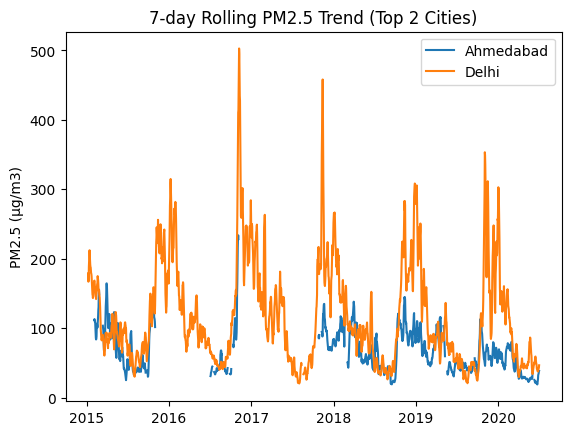

In [11]:
top_cities = city_day['City'].value_counts().index[:2]
for c in top_cities:
    s = city_day[city_day['City']==c].set_index('Date')['PM2.5']
    s = s.rolling(window=7).mean()
    plt.plot(s, label=c)

plt.legend()
plt.title("7-day Rolling PM2.5 Trend (Top 2 Cities)")
plt.ylabel("PM2.5 (µg/m3)")
plt.show()


In [12]:
city_day.head(100).to_csv("../data/processed/city_day_sample.csv", index=False)
print("Saved sample CSV successfully.")


Saved sample CSV successfully.


In [13]:
print(os.listdir("../data/processed"))


['city_day_sample.csv']


In [14]:
city_hour['hour'] = city_hour['Datetime'].dt.hour
city_hour['dayofweek'] = city_hour['Datetime'].dt.dayofweek
city_hour['month'] = city_hour['Datetime'].dt.month


In [15]:
city_hour.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,hour,dayofweek,month
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,1,3,1
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,2,3,1
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,3,3,1
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,4,3,1
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,5,3,1


In [16]:
city_hour['hour_sin'] = np.sin(2 * np.pi * city_hour['hour'] / 24)
city_hour['hour_cos'] = np.cos(2 * np.pi * city_hour['hour'] / 24)


In [17]:
city_hour[['hour', 'hour_sin', 'hour_cos']].head()


,hour,hour_sin,hour_cos
0,1,0.258819,0.965926
1,2,0.500000,0.866025
2,3,0.707107,0.707107
3,4,0.866025,0.500000
4,5,0.965926,0.258819


In [18]:
for col in ['PM2.5','PM10']:
    if col in city_hour.columns:
        for lag in [1,3,6,12,24]:
            city_hour[f'{col}_lag{lag}'] = city_hour.groupby("City")[col].shift(lag)


In [19]:
# Show first 10 rows with all lag columns
lag_cols = [f'{col}_lag{lag}' for col in ['PM2.5','PM10'] for lag in [1,3,6,12,24]]
city_hour[['City','Datetime'] + lag_cols].head(10)


,City,Datetime,PM2.5_lag1,PM2.5_lag3,PM2.5_lag6,PM2.5_lag12,PM2.5_lag24,PM10_lag1,PM10_lag3,PM10_lag6,PM10_lag12,PM10_lag24
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for col in ['PM2.5','PM10']:
    if col in city_hour.columns:
        for window in [3,6,24]:
            city_hour[f'{col}_roll{window}'] = (
                city_hour.groupby("City")[col]
                .rolling(window, min_periods=1).mean()
                .reset_index(level=0, drop=True)
            )


In [21]:
roll_cols = [f'{col}_roll{window}' for col in ['PM2.5','PM10'] for window in [3,6,24]]
city_hour[['City','Datetime'] + roll_cols].head(10)


,City,Datetime,PM2.5_roll3,PM2.5_roll6,PM2.5_roll24,PM10_roll3,PM10_roll6,PM10_roll24
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def conc_to_aqi(conc):
    if pd.isna(conc): return np.nan
    if conc <= 30: return "Good"
    if conc <= 60: return "Satisfactory"
    if conc <= 90: return "Moderate"
    if conc <= 120: return "Poor"
    if conc <= 250: return "Very Poor"
    return "Severe"

city_day['AQI_Category_Calc'] = city_day['PM2.5'].apply(conc_to_aqi)


In [23]:
city_day[['Date','City','PM2.5','AQI_Category_Calc']].head(10)


,Date,City,PM2.5,AQI_Category_Calc
0,2015-01-01,Ahmedabad,NaN,NaN
1,2015-01-02,Ahmedabad,NaN,NaN
2,2015-01-03,Ahmedabad,NaN,NaN
3,2015-01-04,Ahmedabad,NaN,NaN
4,2015-01-05,Ahmedabad,NaN,NaN
5,2015-01-06,Ahmedabad,NaN,NaN
6,2015-01-07,Ahmedabad,NaN,NaN
7,2015-01-08,Ahmedabad,NaN,NaN
8,2015-01-09,Ahmedabad,NaN,NaN
9,2015-01-10,Ahmedabad,NaN,NaN


In [24]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3']
corr = city_day[pollutants].corr()
print(corr)


          PM2.5      PM10       NO2       SO2        CO        O3
PM2.5  1.000000  0.846498  0.350709  0.132325  0.089912  0.161238
PM10   0.846498  1.000000  0.464380  0.256974  0.112588  0.244919
NO2    0.350709  0.464380  1.000000  0.392233  0.356521  0.293349
SO2    0.132325  0.256974  0.392233  1.000000  0.489697  0.162142
CO     0.089912  0.112588  0.356521  0.489697  1.000000  0.041736
O3     0.161238  0.244919  0.293349  0.162142  0.041736  1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15980\997195626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Date'] = pd.to_datetime(delhi_df['Date'])


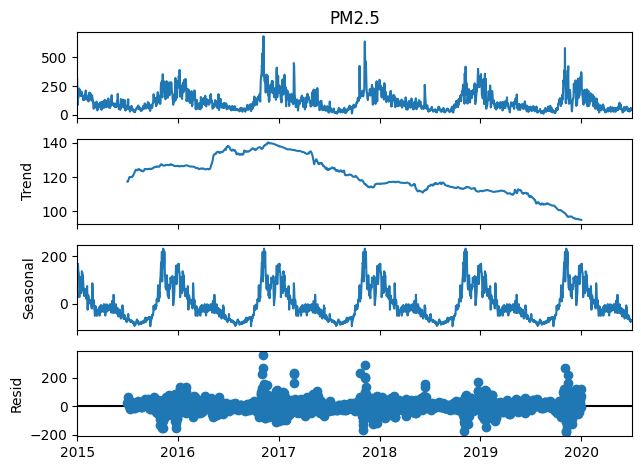

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Filter Delhi data from city_day
delhi_df = city_day[city_day['City'] == 'Delhi']

# 2. Convert Date to datetime and set as index
delhi_df['Date'] = pd.to_datetime(delhi_df['Date'])
delhi_df = delhi_df.set_index('Date')

# 3. Select the PM2.5 column (or any pollutant column you want)
delhi_series = delhi_df['PM2.5']

# 4. Resample to daily and interpolate
delhi_daily = delhi_series.resample('D').mean().interpolate()

# 5. Seasonal decomposition (1-year seasonality = 365 days)
res = seasonal_decompose(delhi_daily, model='additive', period=365)

# 6. Plot the decomposition
res.plot()
plt.show()


In [32]:
print(city_hour.describe())


                            Datetime          PM2.5           PM10  \
count                         707875  562787.000000  411138.000000   
mean   2018-05-14 02:41:03.445098752      67.622994     119.075804   
min              2015-01-01 01:00:00       0.010000       0.010000   
25%              2017-04-15 23:00:00      26.200000      52.380000   
50%              2018-08-04 20:00:00      46.420000      91.500000   
75%              2019-09-02 14:00:00      79.490000     147.520000   
max              2020-07-01 00:00:00     999.990000    1000.000000   
std                              NaN      74.730496     104.224752   

                  NO            NO2            NOx            NH3  \
count  591243.000000  590753.000000  584651.000000  435333.000000   
mean       17.421755      28.885157      32.287565      23.607959   
min         0.010000       0.010000       0.000000       0.010000   
25%         3.840000      10.810000      10.660000       8.120000   
50%         7.960000    

In [33]:
city_hour.to_csv("../data/processed/city_hour_processed.csv", index=False)
print("Processed city_hour dataset saved.")


Processed city_hour dataset saved.


In [34]:
city_hour.head(10)        # shows first 10 rows (in Jupyter, this displays as a table)


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM10_lag3,PM10_lag6,PM10_lag12,PM10_lag24,PM2.5_roll3,PM2.5_roll6,PM2.5_roll24,PM10_roll3,PM10_roll6,PM10_roll24
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
meta = {
    "rows": int(len(city_hour)),
    "columns": city_hour.columns.tolist(),
    "start": str(city_hour['Datetime'].min()),
    "end": str(city_hour['Datetime'].max())
}
print(meta)


{'rows': 707875, 'columns': ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'hour', 'dayofweek', 'month', 'hour_sin', 'hour_cos', 'PM2.5_lag1', 'PM2.5_lag3', 'PM2.5_lag6', 'PM2.5_lag12', 'PM2.5_lag24', 'PM10_lag1', 'PM10_lag3', 'PM10_lag6', 'PM10_lag12', 'PM10_lag24', 'PM2.5_roll3', 'PM2.5_roll6', 'PM2.5_roll24', 'PM10_roll3', 'PM10_roll6', 'PM10_roll24'], 'start': '2015-01-01 01:00:00', 'end': '2020-07-01 00:00:00'}


In [36]:
print(station_day.columns.tolist())


['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [37]:
station_col = [c for c in station_day.columns if "station" in c.lower()]
if station_col:
    station_day.groupby(station_col[0])['PM2.5'].mean().sort_values(ascending=False).head()
else:
    print("No station column found in station_day!")


In [38]:
for c in station_day.columns:
    print(repr(c))


'StationId'
'Date'
'PM2.5'
'PM10'
'NO'
'NO2'
'NOx'
'NH3'
'CO'
'SO2'
'O3'
'Benzene'
'Toluene'
'Xylene'
'AQI'
'AQI_Bucket'


In [39]:
# Remove leading/trailing spaces and non-breaking spaces
station_day.columns = [c.strip().replace("\xa0", "") for c in station_day.columns]
print(station_day.columns.tolist())


['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [40]:
print("Missing values in station_day:\n", station_day.isna().sum())
print("\nMissing values in station_hour:\n", station_hour.isna().sum())
print("\nMissing values in stations:\n", stations.isna().sum())


Missing values in station_day:
 StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

Missing values in station_hour:
 StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

Missing values in stations:
 StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64


In [41]:
print(station_day.describe())


                                Date         PM2.5          PM10  \
count                         108035  86410.000000  65329.000000   
mean   2018-08-17 12:32:02.976813056     80.272571    157.968427   
min              2015-01-01 00:00:00      0.020000      0.010000   
25%              2017-10-14 00:00:00     31.880000     70.150000   
50%              2018-12-02 00:00:00     55.950000    122.090000   
75%              2019-10-16 00:00:00     99.920000    208.670000   
max              2020-07-01 00:00:00   1000.000000   1000.000000   
std                              NaN     76.526403    123.418672   

                 NO           NO2           NOx           NH3            CO  \
count  90929.000000  91488.000000  92535.000000  59930.000000  95037.000000   
mean      23.123424     35.240760     41.195055     28.732875      1.605749   
min        0.010000      0.010000      0.000000      0.010000      0.000000   
25%        4.840000     15.090000     13.970000     11.900000      0.53

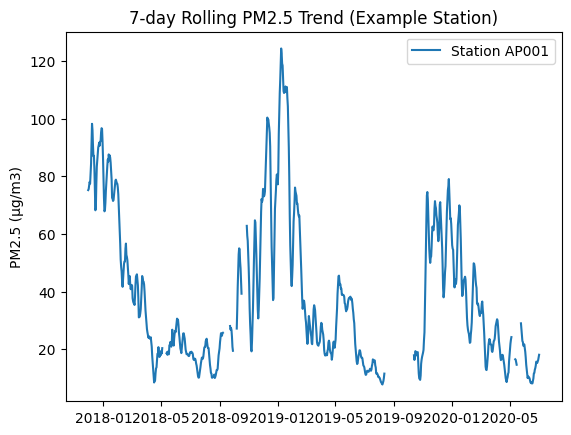

In [42]:
if "StationId" in station_day.columns:
    example_station = station_day['StationId'].iloc[0]
    s = station_day[station_day['StationId']==example_station].set_index('Date')['PM2.5']
    s = s.rolling(window=7).mean()
    plt.plot(s, label=f"Station {example_station}")

    plt.legend()
    plt.title("7-day Rolling PM2.5 Trend (Example Station)")
    plt.ylabel("PM2.5 (µg/m3)")
    plt.show()


In [43]:
station_day.head(100).to_csv("../data/processed/station_day_sample.csv", index=False)
station_hour.head(100).to_csv("../data/processed/station_hour_sample.csv", index=False)
stations.to_csv("../data/processed/stations_sample.csv", index=False)

print("Saved station_day, station_hour, stations sample CSVs successfully.")


Saved station_day, station_hour, stations sample CSVs successfully.


In [44]:
print("Saved station_day, station_hour, stations sample CSVs successfully.")

# Show previews
print("\nstation_day sample:")
print(station_day.head(10))   # first 10 rows

print("\nstation_hour sample:")
print(station_hour.head(10))

print("\nstations sample:")
print(stations.head(10))


Saved station_day, station_hour, stations sample CSVs successfully.

station_day sample:
  StationId       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
0     AP001 2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
1     AP001 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2     AP001 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   
3     AP001 2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59   
4     AP001 2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00   
5     AP001 2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55   
6     AP001 2017-11-30  69.80  114.86  4.69  20.17  14.54  10.95  0.12  14.07   
7     AP001 2017-12-01  73.96  113.56  4.58  19.29  13.97  10.95  0.10  13.90   
8     AP001 2017-12-02  89.90  140.20  7.71  26.19  19.87  13.12  0.10  19.37   
9     AP001 2017-12-03  87.14  130.52  0.97  21.31  12.12  14.36  0.15  11.41   

       O3  Benzene 

In [45]:
station_hour['hour'] = station_hour['Datetime'].dt.hour
station_hour['dayofweek'] = station_hour['Datetime'].dt.dayofweek
station_hour['month'] = station_hour['Datetime'].dt.month


In [46]:
station_hour['hour'] = station_hour['Datetime'].dt.hour
station_hour['dayofweek'] = station_hour['Datetime'].dt.dayofweek
station_hour['month'] = station_hour['Datetime'].dt.month

# Show first 10 rows with new columns
print(station_hour[['Datetime', 'hour', 'dayofweek', 'month']].head(10))


             Datetime  hour  dayofweek  month
0 2017-11-24 17:00:00    17          4     11
1 2017-11-24 18:00:00    18          4     11
2 2017-11-24 19:00:00    19          4     11
3 2017-11-24 20:00:00    20          4     11
4 2017-11-24 21:00:00    21          4     11
5 2017-11-24 22:00:00    22          4     11
6 2017-11-24 23:00:00    23          4     11
7 2017-11-25 00:00:00     0          5     11
8 2017-11-25 01:00:00     1          5     11
9 2017-11-25 02:00:00     2          5     11


In [47]:
station_hour.head(10)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,hour,dayofweek,month
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.10,6.10,0.10,NaN,NaN,17,4,11
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.10,6.25,0.15,NaN,NaN,18,4,11
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.20,5.98,0.18,NaN,NaN,19,4,11
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.20,6.72,0.10,NaN,NaN,20,4,11
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.20,5.75,0.08,NaN,NaN,21,4,11
5,AP001,2017-11-24 22:00:00,69.25,108.25,0.70,18.47,10.38,13.80,0.1,9.25,91.10,0.20,5.02,0.00,NaN,NaN,22,4,11
6,AP001,2017-11-24 23:00:00,67.50,111.50,1.05,12.15,7.30,17.65,0.1,9.40,112.70,0.20,5.60,0.10,NaN,NaN,23,4,11
7,AP001,2017-11-25 00:00:00,68.00,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,0.20,5.55,0.05,NaN,NaN,0,5,11
8,AP001,2017-11-25 01:00:00,73.00,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,0.20,6.60,0.00,NaN,NaN,1,5,11
9,AP001,2017-11-25 02:00:00,81.00,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,0.23,6.77,0.10,NaN,NaN,2,5,11


In [48]:
station_hour['hour_sin'] = np.sin(2 * np.pi * station_hour['hour'] / 24)
station_hour['hour_cos'] = np.cos(2 * np.pi * station_hour['hour'] / 24)


In [49]:
station_hour[['hour', 'hour_sin', 'hour_cos']].head(10)


,hour,hour_sin,hour_cos
0,17,-0.965926,-2.588190e-01
1,18,-1.000000,-1.836970e-16
2,19,-0.965926,2.588190e-01
3,20,-0.866025,5.000000e-01
4,21,-0.707107,7.071068e-01
5,22,-0.500000,8.660254e-01
6,23,-0.258819,9.659258e-01
7,0,0.000000,1.000000e+00
8,1,0.258819,9.659258e-01
9,2,0.500000,8.660254e-01


In [50]:
for col in ['PM2.5','PM10']:
    if col in station_hour.columns:
        for lag in [1,3,6,12,24]:
            station_hour[f'{col}_lag{lag}'] = station_hour.groupby("StationId")[col].shift(lag)


In [51]:
station_hour[['StationId','PM2.5','PM2.5_lag1','PM2.5_lag3','PM2.5_lag6']].head(15)


,StationId,PM2.5,PM2.5_lag1,PM2.5_lag3,PM2.5_lag6
0,AP001,60.50,NaN,NaN,NaN
1,AP001,65.50,60.50,NaN,NaN
2,AP001,80.00,65.50,NaN,NaN
3,AP001,81.50,80.00,60.50,NaN
4,AP001,75.25,81.50,65.50,NaN
5,AP001,69.25,75.25,80.00,NaN
6,AP001,67.50,69.25,81.50,60.50
7,AP001,68.00,67.50,75.25,65.50
8,AP001,73.00,68.00,69.25,80.00
9,AP001,81.00,73.00,67.50,81.50


In [52]:
for col in ['PM2.5','PM10']:
    if col in station_hour.columns:
        for window in [3,6,24]:
            station_hour[f'{col}_roll{window}'] = (
                station_hour.groupby("StationId")[col]
                .rolling(window, min_periods=1).mean()
                .reset_index(level=0, drop=True)
            )


In [53]:
station_hour[['StationId','PM2.5','PM2.5_roll3','PM2.5_roll6','PM2.5_roll24']].head(15)


,StationId,PM2.5,PM2.5_roll3,PM2.5_roll6,PM2.5_roll24
0,AP001,60.50,60.500000,60.500000,60.500000
1,AP001,65.50,63.000000,63.000000,63.000000
2,AP001,80.00,68.666667,68.666667,68.666667
3,AP001,81.50,75.666667,71.875000,71.875000
4,AP001,75.25,78.916667,72.550000,72.550000
5,AP001,69.25,75.333333,72.000000,72.000000
6,AP001,67.50,70.666667,73.166667,71.357143
7,AP001,68.00,68.250000,73.583333,70.937500
8,AP001,73.00,69.500000,72.416667,71.166667
9,AP001,81.00,74.000000,72.333333,72.150000


In [54]:
def conc_to_aqi(conc):
    if pd.isna(conc): return np.nan
    if conc <= 30: return "Good"
    if conc <= 60: return "Satisfactory"
    if conc <= 90: return "Moderate"
    if conc <= 120: return "Poor"
    if conc <= 250: return "Very Poor"
    return "Severe"

station_day['AQI_Category_Calc'] = station_day['PM2.5'].apply(conc_to_aqi)


In [55]:
station_day[['PM2.5', 'AQI_Category_Calc']].head(10)


,PM2.5,AQI_Category_Calc
0,71.36,Moderate
1,81.40,Moderate
2,78.32,Moderate
3,88.76,Moderate
4,64.18,Moderate
5,72.47,Moderate
6,69.80,Moderate
7,73.96,Moderate
8,89.90,Moderate
9,87.14,Moderate


In [56]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3']
corr_station = station_day[pollutants].corr()
print(corr_station)


          PM2.5      PM10       NO2       SO2        CO        O3
PM2.5  1.000000  0.858750  0.445639  0.195771  0.094220  0.133021
PM10   0.858750  1.000000  0.487891  0.277418  0.216346  0.044404
NO2    0.445639  0.487891  1.000000  0.289192  0.176172  0.223971
SO2    0.195771  0.277418  0.289192  1.000000  0.371101  0.134844
CO     0.094220  0.216346  0.176172  0.371101  1.000000  0.009479
O3     0.133021  0.044404  0.223971  0.134844  0.009479  1.000000


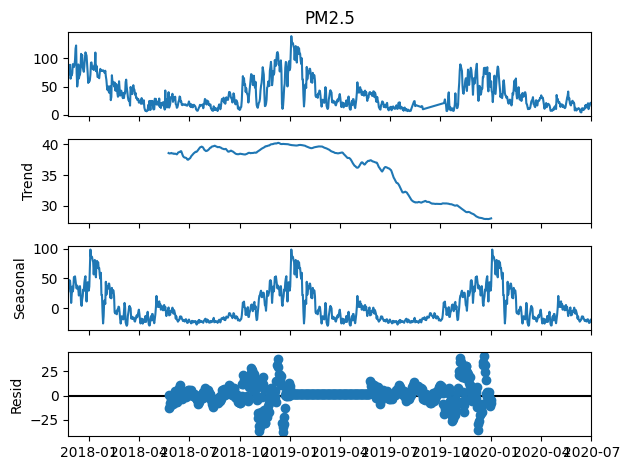

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Pick one station ID
example_station = station_day['StationId'].iloc[0]   # first station (you can change)

# Make sure Date column is datetime
station_day['Date'] = pd.to_datetime(station_day['Date'])

# Create time series for the station
station_series = (
    station_day[station_day['StationId'] == example_station]
    .set_index('Date')['PM2.5']
    .sort_index()                      # ensure time order
    .resample('D').mean()              # daily resample
    .interpolate(method='linear')      # fill missing values
)

# Apply seasonal decomposition
res_station = seasonal_decompose(station_series, model='additive', period=365)

# Plot result
res_station.plot()
plt.show()


In [58]:
print(station_hour.describe())


                            Datetime         PM2.5          PM10  \
count                        2589083  1.941394e+06  1.469831e+06   
mean   2018-08-17 09:52:35.777856768  8.086481e+01  1.584839e+02   
min              2015-01-01 01:00:00  1.000000e-02  1.000000e-02   
25%              2017-10-13 20:00:00  2.816000e+01  6.400000e+01   
50%              2018-12-02 06:00:00  5.259000e+01  1.162500e+02   
75%              2019-10-15 06:00:00  9.774000e+01  2.040000e+02   
max              2020-07-01 00:00:00  1.000000e+03  1.000000e+03   
std                              NaN  8.947618e+01  1.397883e+02   

                 NO           NO2           NOx           NH3            CO  \
count  2.035372e+06  2.060110e+06  2.098275e+06  1.352465e+06  2.089781e+06   
mean   2.278825e+01  3.523689e+01  4.055115e+01  2.870856e+01  1.502366e+00   
min    1.000000e-02  1.000000e-02  0.000000e+00  1.000000e-02  0.000000e+00   
25%    3.050000e+00  1.310000e+01  1.135000e+01  1.123000e+01  4.100000

In [59]:
station_day.to_csv("../data/processed/station_day_processed.csv", index=False)
station_hour.to_csv("../data/processed/station_hour_processed.csv", index=False)
stations.to_csv("../data/processed/stations_processed.csv", index=False)

print("Processed station_day, station_hour, stations saved.")


Processed station_day, station_hour, stations saved.


In [60]:
meta_station = {
    "rows": int(len(station_hour)),
    "columns": station_hour.columns.tolist(),
    "start": str(station_hour['Datetime'].min()),
    "end": str(station_hour['Datetime'].max())
}
print(meta_station)


{'rows': 2589083, 'columns': ['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'hour', 'dayofweek', 'month', 'hour_sin', 'hour_cos', 'PM2.5_lag1', 'PM2.5_lag3', 'PM2.5_lag6', 'PM2.5_lag12', 'PM2.5_lag24', 'PM10_lag1', 'PM10_lag3', 'PM10_lag6', 'PM10_lag12', 'PM10_lag24', 'PM2.5_roll3', 'PM2.5_roll6', 'PM2.5_roll24', 'PM10_roll3', 'PM10_roll6', 'PM10_roll24'], 'start': '2015-01-01 01:00:00', 'end': '2020-07-01 00:00:00'}


In [61]:
meta_station_day = {
    "rows": int(len(station_day)),
    "columns": station_day.columns.tolist(),
    "start": str(station_day['Date'].min()),
    "end": str(station_day['Date'].max())
}
print(meta_station_day)


{'rows': 108035, 'columns': ['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'AQI_Category_Calc'], 'start': '2015-01-01 00:00:00', 'end': '2020-07-01 00:00:00'}


In [62]:
# City Day
city_day.head(100).to_csv("../data/processed/city_day_sample.csv", index=False)
city_day.to_csv("../data/processed/city_day_processed.csv", index=False)
print("Saved city_day sample & processed.")


Saved city_day sample & processed.


In [63]:
# City Hour
city_hour.head(100).to_csv("../data/processed/city_hour_sample.csv", index=False)
city_hour.to_csv("../data/processed/city_hour_processed.csv", index=False)
print("Saved city_hour sample & processed.")


Saved city_hour sample & processed.


In [64]:
# Station Day
station_day.head(100).to_csv("../data/processed/station_day_sample.csv", index=False)
station_day.to_csv("../data/processed/station_day_processed.csv", index=False)
print("Saved station_day sample & processed.")


Saved station_day sample & processed.


In [65]:
# Station Hour
station_hour.head(100).to_csv("../data/processed/station_hour_sample.csv", index=False)
station_hour.to_csv("../data/processed/station_hour_processed.csv", index=False)
print("Saved station_hour sample & processed.")


Saved station_hour sample & processed.


In [66]:
# Stations Metadata
stations.head(100).to_csv("../data/processed/stations_sample.csv", index=False)
stations.to_csv("../data/processed/stations_processed.csv", index=False)
print("Saved stations sample & processed.")


Saved stations sample & processed.


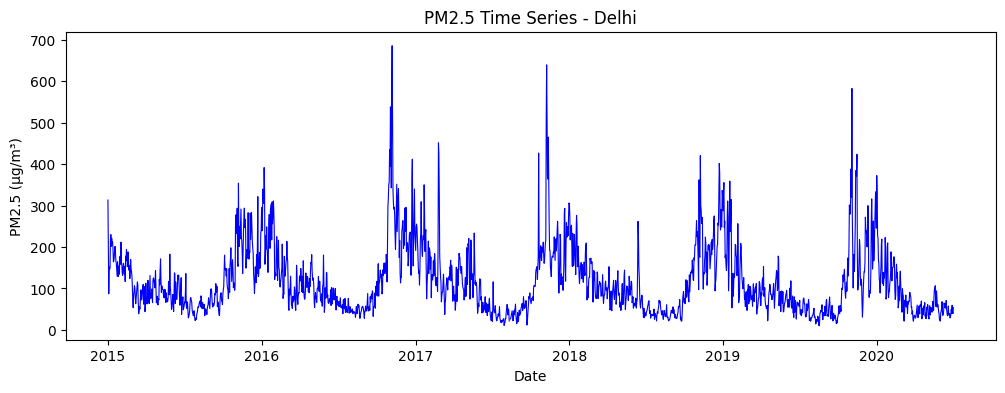

In [67]:
# Pick top polluted city for clear waveform (example: Delhi)
city_name = "Delhi"
df_city = city_day[city_day['City']==city_name].copy()
df_city = df_city.set_index("Date").sort_index()

plt.figure(figsize=(12,4))
plt.plot(df_city.index, df_city['PM2.5'], color="blue", linewidth=0.8)
plt.title(f"PM2.5 Time Series - {city_name}")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


In [68]:
pollutants = ["PM2.5","PM10","NO2","SO2","CO","O3"]

summary_stats = {}
for p in pollutants:
    if p in city_day.columns:
        summary_stats[p] = {
            "Mean": city_day[p].mean(skipna=True),
            "Median": city_day[p].median(skipna=True),
            "Max": city_day[p].max(skipna=True),
            "Min": city_day[p].min(skipna=True),
            "StdDev": city_day[p].std(skipna=True),
            "DataPoints": city_day[p].count()
        }

pd.DataFrame(summary_stats)


,PM2.5,PM10,NO2,SO2,CO,O3
Mean,67.450578,118.127103,28.560659,14.531977,2.248598,34.491430
Median,48.570000,95.680000,21.690000,9.160000,0.890000,30.840000
Max,949.990000,1000.000000,362.210000,193.860000,175.810000,257.730000
Min,0.040000,0.010000,0.010000,0.010000,0.000000,0.010000
StdDev,64.661449,90.605110,24.474746,18.133775,6.962884,21.694928
DataPoints,24933.000000,18391.000000,25946.000000,25677.000000,27472.000000,25509.000000


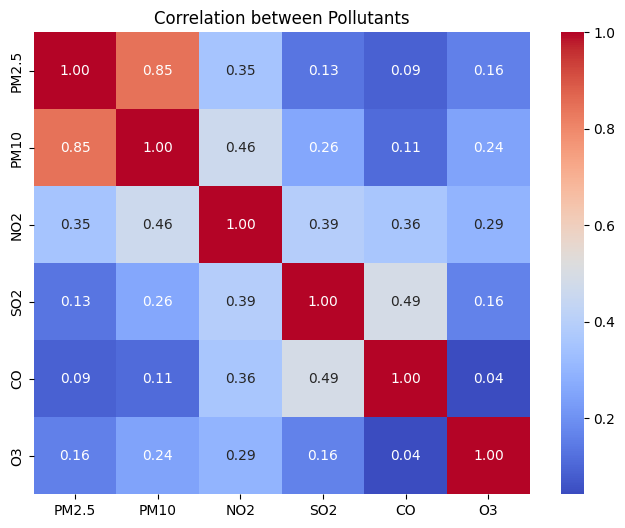

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(city_day[pollutants].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Pollutants")
plt.show()


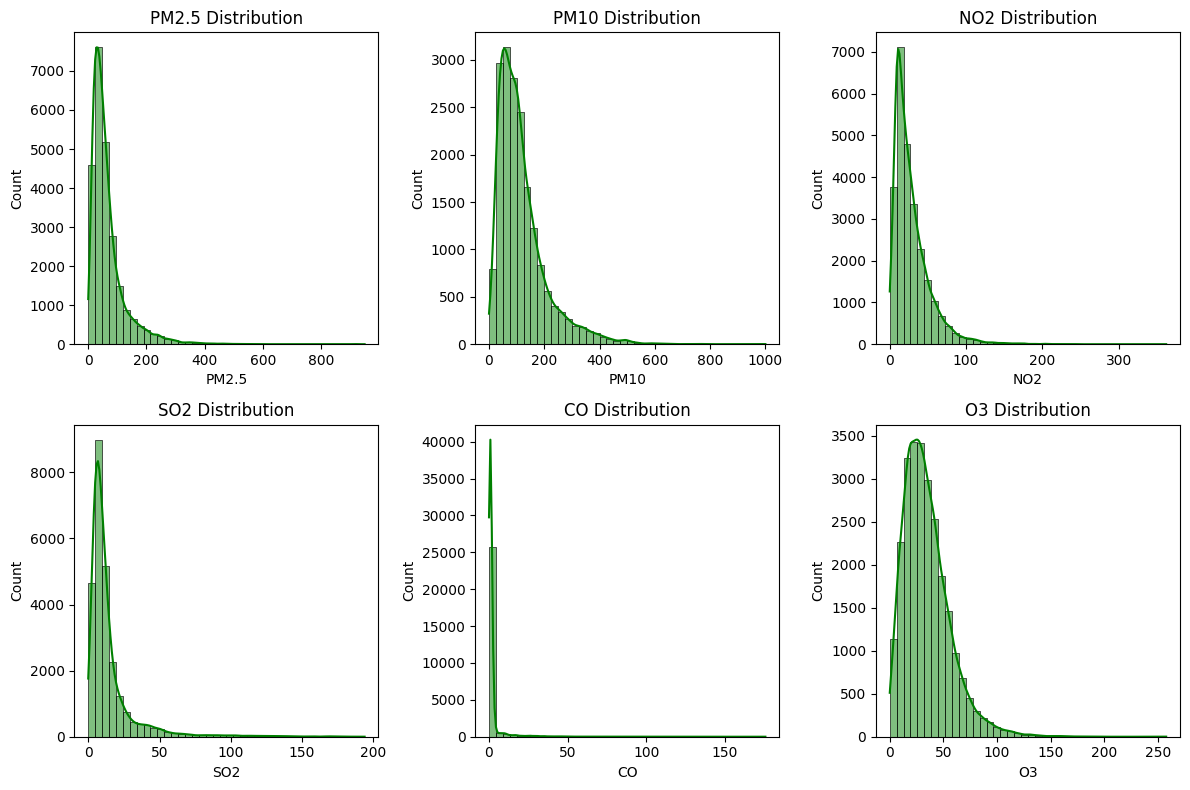

In [70]:
plt.figure(figsize=(12,8))
for i,p in enumerate(pollutants,1):
    if p in city_day.columns:
        plt.subplot(2,3,i)
        sns.histplot(city_day[p].dropna(), kde=True, bins=40, color="green")
        plt.title(f"{p} Distribution")
plt.tight_layout()
plt.show()


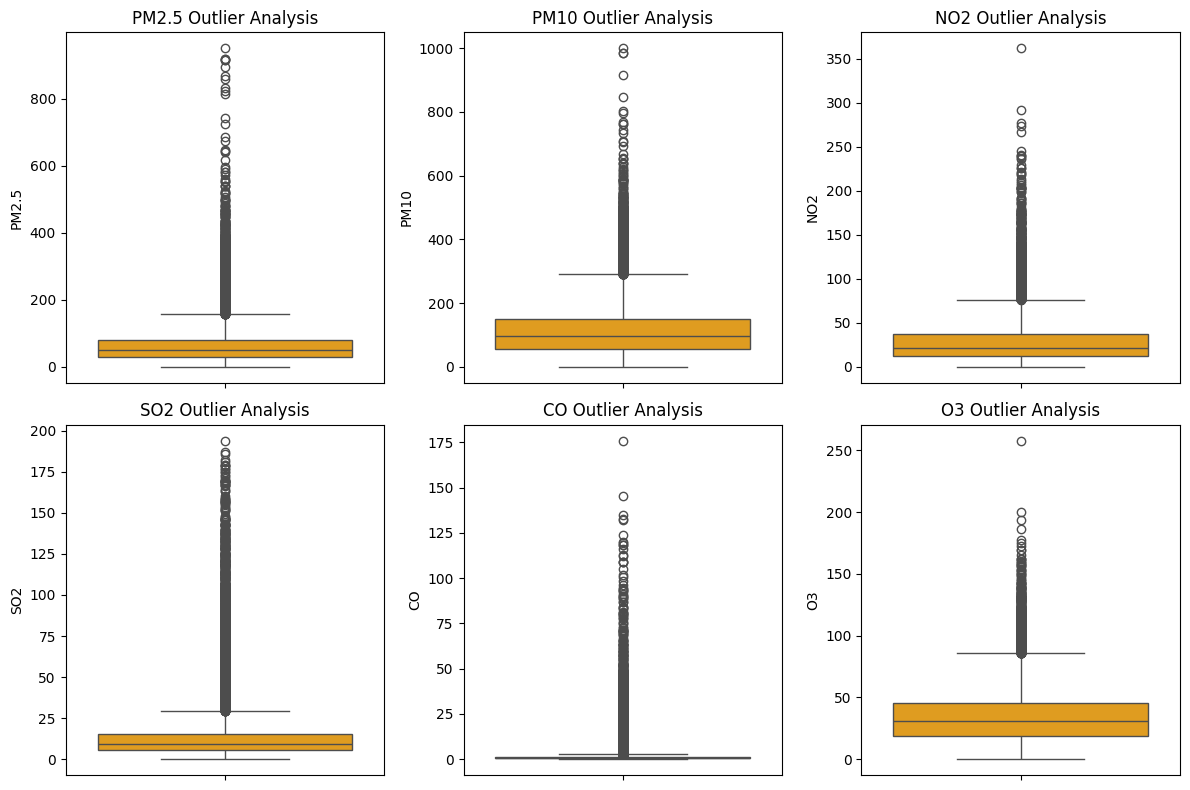

In [71]:
plt.figure(figsize=(12,8))
for i,p in enumerate(pollutants,1):
    if p in city_day.columns:
        plt.subplot(2,3,i)
        sns.boxplot(y=city_day[p], color="orange")
        plt.title(f"{p} Outlier Analysis")
plt.tight_layout()
plt.show()
